In [1]:
#Importamos las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos que utilizaremos
df0=pd.read_csv('datos.dat')

In [3]:
#Cramos un nuevo DF con los datos que utilizaremos del DF anterior
d = {'FECHA':df0.TIMESTAMP,'AIRTEMP':df0.AirTC_Avg}
df = pd.DataFrame(d)
df.head()

,AIRTEMP,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [4]:
#Verificamos si la fecha es tipo fecha, si no, la cambiamos a tipo fecha
df.dtypes

AIRTEMP    float64
FECHA       object
dtype: object

In [5]:
#Cambiamos de object a date el tipo de la fecha
df['FECHA']=pd.to_datetime(df.apply(lambda x: x['FECHA'],1), dayfirst=True)
df.head()

,AIRTEMP,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
#Filtramos nuestros datos con los datos que usaremos solamente (del 01/11/18 a 28/02/19)
df = df[df.FECHA > pd.datetime(2018,11,1)] 

In [7]:
#Creamos nuevas columnas para los años, meses, dias, horas y minitos
df['MINUTO']= df['FECHA'].dt.minute
df['HORA']  = df['FECHA'].dt.hour
df['DIA']   = df['FECHA'].dt.day
df['MES']   = df['FECHA'].dt.month
df['AÑO']   = df['FECHA'].dt.year

#Quitamos la columna de FECHA, por el momento no la ocuparemos
df2=df.drop(['FECHA'],1)

#Ajustos los indices de nuestro DF
f=len(df2)
df2.index = np.arange(0,f)

df2.head()

,AIRTEMP,MINUTO,HORA,DIA,MES,AÑO
0,8.89,10,0,1,11,2018
1,8.66,20,0,1,11,2018
2,8.52,30,0,1,11,2018
3,8.47,40,0,1,11,2018
4,8.58,50,0,1,11,2018


In [8]:
#Sacamos la temperatura promedio del aire por cada hora
df2['AIRTEMP']=df2.groupby(["HORA","DIA","MES","AÑO"])["AIRTEMP"].transform("mean")

#Quitamos las columas de los minutos, ya que ya no las necesitamos
df2=df2.drop(['MINUTO'],1)

df2.head()

,AIRTEMP,HORA,DIA,MES,AÑO
0,8.624,0,1,11,2018
1,8.624,0,1,11,2018
2,8.624,0,1,11,2018
3,8.624,0,1,11,2018
4,8.624,0,1,11,2018


In [9]:
#Eliminamos los datos repetidos de nuestro DF
df2=df2.drop_duplicates()

#Ajustamos los indices de nuestro DFn
n=len(df2)
df2.index=np.arange(0,n)
df2.head()

,AIRTEMP,HORA,DIA,MES,AÑO
0,8.624000,0,1,11,2018
1,8.493333,1,1,11,2018
2,8.690000,2,1,11,2018
3,8.846667,3,1,11,2018
4,7.397500,4,1,11,2018


In [10]:
# Calculamos la columna de UF24
count=[]
for i in range (0,len(df2)):
    rr=df2.AIRTEMP[i]
    if (rr<1.4) :
        j=0
        
    if (rr>=1.4 and rr<=2.4) :
        j=0.5   
        
    if (rr>2.4 and rr<=9.1) :
        j=1
        
    if (rr>9.1 and rr<=12.4) :
        j=0.5
        
    if (rr>12.4 and rr<=15.9) :
        j=0
        
    if (rr>15.9 and rr<=18) :
        j=-0.5
        
    if (rr>18) :
        j=-1

    count.append(j)
df2["UF24"]=count
df2.head()

,AIRTEMP,HORA,DIA,MES,AÑO,UF24
0,8.624000,0,1,11,2018,1.0
1,8.493333,1,1,11,2018,1.0
2,8.690000,2,1,11,2018,1.0
3,8.846667,3,1,11,2018,1.0
4,7.397500,4,1,11,2018,1.0


In [11]:
#Cremos las nuevas columnas de:
# HF  = Número de horas frío por día (0 < T <= 10ºC)
# HC  = Número de horas con T >= 25ºC
# HFE = Número de horas frío efectivas por día ( HFE= HF - HC)
HF=[]
HC=[]
for i in range (0,len(df2)):
    x=df2.AIRTEMP[i]
    if (x<=10) :
        j=1
    if (x>10) :
        j=0  
    HF.append(j)
df2["HF"]=HF

for i in range (0,len(df2)):
    x=df2.AIRTEMP[i]
    if (x>=25) :
        j=1
    if (x<25) :
        j=0  
    HC.append(j)
df2["HC"]=HC

df2["HFE"]=df2["HF"]-df2["HC"]
df2.head(25)

,AIRTEMP,HORA,DIA,MES,AÑO,UF24,HF,HC,HFE
0,8.624000,0,1,11,2018,1.0,1,0,1
1,8.493333,1,1,11,2018,1.0,1,0,1
2,8.690000,2,1,11,2018,1.0,1,0,1
3,8.846667,3,1,11,2018,1.0,1,0,1
4,7.397500,4,1,11,2018,1.0,1,0,1
5,7.289833,5,1,11,2018,1.0,1,0,1
6,6.806833,6,1,11,2018,1.0,1,0,1
7,8.110167,7,1,11,2018,1.0,1,0,1
8,14.960000,8,1,11,2018,0.0,0,0,0
9,19.710000,9,1,11,2018,-1.0,0,0,0


In [12]:
#Contamos los valores de UF24, HF, HC Y HEF por día
df2["UF24"] = df2.groupby(["AÑO","MES","DIA"])["UF24"].transform("sum")
df2["HF"] = df2.groupby(["AÑO","MES","DIA"])["HF"].transform("sum")
df2["HC"] = df2.groupby(["AÑO","MES","DIA"])["HC"].transform("sum")
df2["HFE"] = df2.groupby(["AÑO","MES","DIA"])["HFE"].transform("sum")
df2.head(25)

,AIRTEMP,HORA,DIA,MES,AÑO,UF24,HF,HC,HFE
0,8.624000,0,1,11,2018,-0.5,8,6,2
1,8.493333,1,1,11,2018,-0.5,8,6,2
2,8.690000,2,1,11,2018,-0.5,8,6,2
3,8.846667,3,1,11,2018,-0.5,8,6,2
4,7.397500,4,1,11,2018,-0.5,8,6,2
5,7.289833,5,1,11,2018,-0.5,8,6,2
6,6.806833,6,1,11,2018,-0.5,8,6,2
7,8.110167,7,1,11,2018,-0.5,8,6,2
8,14.960000,8,1,11,2018,-0.5,8,6,2
9,19.710000,9,1,11,2018,-0.5,8,6,2


In [13]:
#Quitamos datos repetidos por hora 
df2 = df2.drop_duplicates(subset=['AÑO','MES','DIA'])
df2=df2.reset_index(drop=True)
df2.head(25)


,AIRTEMP,HORA,DIA,MES,AÑO,UF24,HF,HC,HFE
0,8.624000,0,1,11,2018,-0.5,8,6,2
1,10.556667,0,2,11,2018,-9.0,0,8,-8
2,12.470000,0,3,11,2018,-9.5,0,8,-8
3,12.733333,0,4,11,2018,-11.5,0,8,-8
4,13.950000,0,5,11,2018,-8.0,0,8,-8
5,12.798333,0,6,11,2018,-12.0,0,8,-8
6,13.993333,0,7,11,2018,-8.5,0,8,-8
7,12.008333,0,8,11,2018,-10.0,0,8,-8
8,12.336667,0,9,11,2018,-9.0,0,8,-8
9,12.115000,0,10,11,2018,-5.0,3,6,-3


In [14]:
#Crear arreglos con la información de UF24CUM y HFE para realizar gráficas
HFE = [df2['HFE'][i] for i in range(0,len(df2))]
UF24 = [df2['UF24'][i] for i in range(0,len(df2))]

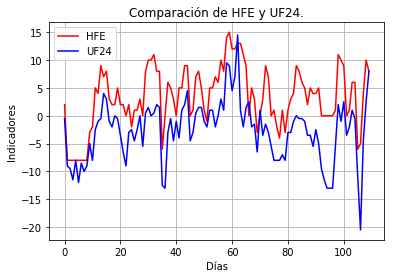

In [15]:
#Se grafican los dos arreglos para comparar valores
H = HFE
U = UF24

plt.plot(H, label = "HFE", color = 'RED')   
plt.plot(U, label = "UF24", color = 'BLUE')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de HFE y UF24.')
plt.savefig('Gráfica1',plt=2000)
plt.show()

In [16]:
#Crear arreglos con la información de UF24 acumulado y HFE acumulado para realizar gráficas
HFEs = df2['HFE'].cumsum()
UF24s = df2['UF24'].cumsum()

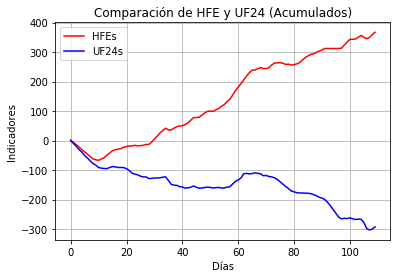

In [17]:
#Se grafican los dos arreglos para comparar valores
#Crear gráfica de evolución de temperatura mínima y máxima
Hs = HFEs
Us = UF24s

plt.plot(Hs, label = "HFEs", color = 'RED')   
plt.plot(Us, label = "UF24s", color = 'BLUE')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de HFE y UF24 (Acumulados)')
plt.savefig('Gráfica2',plt=2000)
plt.show()